In [1]:
import os

import pandas as pd
import numpy as np
from numpy import savetxt

import keras 
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense 
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.utils import to_categorical

%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

import itertools
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import random as rn

from google.colab import files

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Uploading train-subset for the COPD class

uploaded = files.upload()

Saving Pattern_1_COPD.csv to Pattern_1_COPD.csv


In [3]:
# Uploading train-subset for the HC class

uploaded = files.upload()

Saving Pattern_0_Healthy.csv to Pattern_0_Healthy.csv


In [4]:
# Uploading test-subset for the COPD class

uploaded = files.upload()

Saving Test_Samples_COPD.csv to Test_Samples_COPD.csv


In [5]:
# Uploading test-subset for the HC class

uploaded = files.upload()

Saving Test_Samples_Healthy.csv to Test_Samples_Healthy.csv


In [0]:
# Preparing train-dataset for the every fold of the 5-fold cross_validations 

COPD_data = pd.read_csv('Pattern_1_COPD.csv', header=None)
COPD_data = pd.DataFrame.to_numpy(COPD_data)

HC_data = pd.read_csv('Pattern_0_Healthy.csv', header=None)
HC_data = pd.DataFrame.to_numpy(HC_data)

X_train = np.concatenate([COPD_data, HC_data], axis=0)

In [0]:
# Preparing test-dataset for the every fold of the 5-fold cross_validations 

COPD_Tdata = pd.read_csv('Test_Samples_COPD.csv', header=None)
COPD_Tdata = pd.DataFrame.to_numpy(COPD_Tdata)

HC_Tdata = pd.read_csv('Test_Samples_Healthy.csv', header=None)
HC_Tdata = pd.DataFrame.to_numpy(HC_Tdata)

X_test = np.concatenate([COPD_Tdata, HC_Tdata], axis=0)

In [0]:
y_COPD= np.ones([32, 1])
y_HC= np.zeros([32, 1])

y_train = np.concatenate([y_COPD, y_HC], axis=0)


y_TCOPD= np.ones([8,])
y_THC= np.zeros([8,])

y_test = np.concatenate([y_TCOPD, y_THC], axis=0)

In [0]:
seed = 97
np.random.seed (seed)

rn.seed (seed)

In [10]:
#SVM classifier performance
svc = SVC(kernel = 'rbf',C=1000, gamma=0.1, probability = True)

y_pred = svc.fit(X_train, y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
svc.score(X_train,y_train), svc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.984375, 0.875)

In [0]:
# ANN simulation model with one hidden-layer and one readout layer topology

model = Sequential([
    #Dropout(0.2, input_shape=(23,)), 
    Dense(4, input_shape=(23,), activation='sigmoid'),
    Dense(2, activation='sigmoid')
])

In [0]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, batch_size=10, epochs=3000, shuffle=True, verbose=2)

Streaming output truncated to the last 5000 lines.
 - 0s - loss: 0.6725 - accuracy: 0.5781
Epoch 502/3000
 - 0s - loss: 0.6712 - accuracy: 0.5781
Epoch 503/3000
 - 0s - loss: 0.6615 - accuracy: 0.6094
Epoch 504/3000
 - 0s - loss: 0.6686 - accuracy: 0.5781
Epoch 505/3000
 - 0s - loss: 0.6648 - accuracy: 0.5625
Epoch 506/3000
 - 0s - loss: 0.6643 - accuracy: 0.5781
Epoch 507/3000
 - 0s - loss: 0.6600 - accuracy: 0.6406
Epoch 508/3000
 - 0s - loss: 0.6608 - accuracy: 0.5781
Epoch 509/3000
 - 0s - loss: 0.6632 - accuracy: 0.6250
Epoch 510/3000
 - 0s - loss: 0.6589 - accuracy: 0.6094
Epoch 511/3000
 - 0s - loss: 0.6666 - accuracy: 0.5938
Epoch 512/3000
 - 0s - loss: 0.6606 - accuracy: 0.6250
Epoch 513/3000
 - 0s - loss: 0.6611 - accuracy: 0.5781
Epoch 514/3000
 - 0s - loss: 0.6673 - accuracy: 0.6562
Epoch 515/3000
 - 0s - loss: 0.6603 - accuracy: 0.5625
Epoch 516/3000
 - 0s - loss: 0.6580 - accuracy: 0.5938
Epoch 517/3000
 - 0s - loss: 0.6602 - accuracy: 0.6094
Epoch 518/3000
 - 0s - loss: 

In [0]:
rounded_predictions = model.predict_classes(X_test, batch_size=10, verbose=0)

In [15]:
Network_Performance = np.mean(y_test==rounded_predictions)
Network_Performance

0.875

In [0]:
cm = confusion_matrix(y_test, rounded_predictions)

In [0]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('Actual Medical Diagnosis')
    plt.xlabel('Neural Network Prediction')

Confusion matrix, without normalization
[[6 2]
 [0 8]]


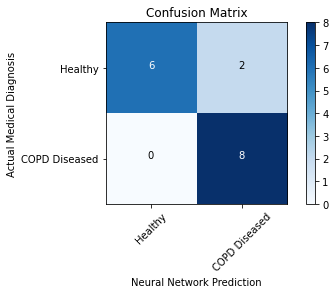

In [18]:
cm_plot_labels = ['Healthy', 'COPD Diseased']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [19]:
#Extracting analog weights for future records

model.get_weights()

[array([[-0.02258197,  0.09499644,  0.01503374, -0.16644393],
        [-0.23637618, -0.06135092,  0.2091223 , -0.36973903],
        [ 0.7764118 ,  0.59031504, -1.0216544 ,  0.60708517],
        [-0.8995925 , -1.2219427 ,  0.9771037 , -1.1934668 ],
        [-0.5129733 , -0.43621185,  0.22007959, -0.35467127],
        [-0.2808626 , -0.10640378,  0.11644875, -0.20671968],
        [ 0.21610062,  0.3998935 , -0.2663381 ,  0.08939629],
        [ 0.37928435,  0.2588585 , -0.04983655,  0.34996858],
        [ 0.9665486 ,  0.53697765, -0.9029593 ,  0.7463843 ],
        [ 1.2223432 ,  0.7537544 , -0.942813  ,  1.4338696 ],
        [ 1.7834123 ,  1.4776452 , -1.2218417 ,  1.8230628 ],
        [ 1.1878363 ,  0.88107824, -0.85280985,  0.77609813],
        [ 0.5949987 ,  0.6446114 , -0.18293132,  0.8945041 ],
        [ 0.03092397,  0.04079857,  0.49238622, -0.58155805],
        [-0.16819651, -0.164535  ,  0.26870385, -0.05153048],
        [-0.17854464, -0.43050945,  0.22739618, -0.1367967 ],
        

In [20]:
#Uploading analog weights of the trained ANN model for conversion into 10-bit resolution topology 

uploaded = files.upload()

Saving w1.csv to w1.csv


In [21]:
uploaded = files.upload()

Saving w2.csv to w2.csv


In [0]:
w1_data = pd.read_csv('w1.csv', header=None)
w1_data = pd.DataFrame.to_numpy(w1_data)

w2_data = pd.read_csv('w2.csv', header=None)
w2_data = pd.DataFrame.to_numpy(w2_data)

In [0]:
x=w1_data
x2 = w2_data

bias= np.array([0.19141035,	0.43812883,	-0.43519613,	-0.36285147])
bias2= np.array([-1.0543804,	-0.7916761])

In [0]:
#Below paramters are for 10-bit thresholding (5 positive bits and 5 negative)

In [37]:
# Here we calculate the absolute maximum weight/synaptic value in our network and the thresholding steps

Absolute_Max = np.max(abs(x))

if (Absolute_Max < np.max(abs(x2))):
  Absolute_Max = np.max(abs(x2))

elif (Absolute_Max < np.max(abs(bias))):
  Absolute_Max = np.max(abs(bias))

elif (Absolute_Max < np.max(abs(bias2))):
  Absolute_Max = np.max(abs(bias2))

step = Absolute_Max/5
print(Absolute_Max)
print(step)

2.698534
0.5397068


In [38]:
# Calculating the 10-bit resolution thresholds
print('here are the thresholds for positive 5-bit:')
print (step)
print (2*step)
print (3*step)
print (4*step)
print (5*step)

stepn = -1*step
print('here are the thresholds for negative 5-bit:')
print (stepn)
print (2*stepn)
print (3*stepn)
print (4*stepn)
print (5*stepn)

here are the thresholds for positive 5-bit:
0.5397068
1.0794136
1.6191204000000001
2.1588272
2.6985340000000004
here are the thresholds for negative 5-bit:
-0.5397068
-1.0794136
-1.6191204000000001
-2.1588272
-2.6985340000000004


In [39]:
#  10-bit thresholding (5 for positive and 5 for negative values)
#Layer 1: 

for i in range (23): 
  for j in range (4):
    if (0 < x[i,j] < step):
      x[i,j] = step
    elif (step < x[i,j] < 2*step):
      x[i,j] = 2*step
    elif (2*step < x[i,j] < 3*step):
      x[i,j] = 3*step
    elif (3*step < x[i,j] < 4*step):
      x[i,j] = 4*step
    elif (4*step < x[i,j]):
      x[i,j] = 5*step
    elif (stepn < x[i,j] < 0):
      x[i,j] = stepn
    elif (2*stepn < x[i,j] < stepn):
      x[i,j] = 2*stepn
    elif (3*stepn < x[i,j] < 2*stepn):
      x[i,j] = 3*stepn
    elif (4*stepn < x[i,j] < 3*stepn):
      x[i,j] = 4*stepn
    elif (x[i,j] < 4*stepn):
      x[i,j] = 5*stepn

print(x)

[[ 0.5397068  1.0794136 -0.5397068 -1.0794136]
 [ 0.5397068  0.5397068 -1.0794136 -1.0794136]
 [-1.0794136 -1.6191204  1.6191204  1.6191204]
 [ 1.6191204  2.1588272 -1.6191204 -1.6191204]
 [ 1.0794136  0.5397068 -1.0794136 -0.5397068]
 [-0.5397068 -0.5397068 -0.5397068 -1.0794136]
 [ 0.5397068 -1.0794136  0.5397068  1.0794136]
 [-0.5397068 -0.5397068  0.5397068  1.0794136]
 [-1.0794136 -0.5397068  1.0794136  1.0794136]
 [-1.6191204 -1.0794136  1.6191204  1.0794136]
 [-2.698534  -2.698534   2.1588272  2.698534 ]
 [-1.6191204 -2.1588272  1.6191204  1.6191204]
 [-1.6191204 -0.5397068  1.6191204  1.6191204]
 [-0.5397068  0.5397068 -0.5397068 -0.5397068]
 [ 1.0794136  0.5397068 -1.0794136 -0.5397068]
 [ 1.0794136  1.0794136 -0.5397068 -0.5397068]
 [ 0.5397068  0.5397068 -0.5397068  0.5397068]
 [-0.5397068 -0.5397068  0.5397068  0.5397068]
 [ 0.5397068 -0.5397068  0.5397068  0.5397068]
 [-0.5397068 -0.5397068 -0.5397068  0.5397068]
 [-0.5397068  0.5397068 -0.5397068 -0.5397068]
 [ 1.6191204 

In [40]:
#  10-bit thresholding (5 for positive and 5 for negative values)
#Layer 2: 

for i in range (4): 
  for j in range (2):
    if (0 < x2[i,j] < step):
      x2[i,j] = step
    elif (step < x2[i,j] < 2*step):
      x2[i,j] = 2*step
    elif (2*step < x2[i,j] < 3*step):
      x2[i,j] = 3*step
    elif (3*step < x2[i,j] < 4*step):
      x2[i,j] = 4*step
    elif (4*step < x2[i,j]):
      x2[i,j] = 5*step
    elif (stepn < x2[i,j] < 0):
      x2[i,j] = stepn
    elif (2*stepn < x2[i,j] < stepn):
      x2[i,j] = 2*stepn
    elif (3*stepn < x2[i,j] < 2*stepn):
      x2[i,j] = 3*stepn
    elif (4*stepn < x2[i,j] < 3*stepn):
      x2[i,j] = 4*stepn
    elif (x2[i,j] < 4*stepn):
      x2[i,j] = 5*stepn

print(x2)

[[ 1.6191204 -1.6191204]
 [ 1.0794136 -2.698534 ]
 [-2.1588272  1.6191204]
 [-2.1588272  1.0794136]]


In [41]:
# 10-bit thresholding for biases

for i in range (4):
  if (0 < bias[i,] < step):
      bias[i,] = step
  elif (step < bias[i,] < 2*step):
      bias[i,] = 2*step
  elif (2*step < bias[i,] < 3*step):
      bias[i,] = 3*step
  elif (3*step < bias[i,] < 4*step):
      bias[i,] = 4*step
  elif (4*step < bias[i,]):
      bias[i,] = 5*step
  elif (stepn < bias[i,] < 0):
      bias[i,] = stepn
  elif (2*stepn < bias[i,] < stepn):
      bias[i,] = 2*stepn
  elif (3*stepn < bias[i,] < 2*stepn):
      bias[i,] = 3*stepn
  elif (4*stepn < bias[i,] < 3*stepn):
      bias[i,] = 4*stepn
  elif (bias[i,] < 4*stepn):
      bias[i,] = 5*stepn

i=0

for i in range (2):
  if (0 < bias2[i,] < step):
      bias2[i,] = step
  elif (step < bias2[i,] < 2*step):
      bias2[i,] = 2*step
  elif (2*step < bias2[i,] < 3*step):
      bias2[i,] = 3*step
  elif (3*step < bias2[i,] < 4*step):
      bias2[i,] = 4*step
  elif (4*step < bias2[i,]):
      bias2[i,] = 5*step
  elif (stepn < bias2[i,] < 0):
      bias2[i,] = stepn
  elif (2*stepn < bias2[i,] < stepn):
      bias2[i,] = 2*stepn
  elif (3*stepn < bias2[i,] < 2*stepn):
      bias2[i,] = 3*stepn
  elif (4*stepn < bias2[i,] < 3*stepn):
      bias2[i,] = 4*stepn
  elif (bias2[i,] < 4*stepn):
      bias2[i,] = 5*stepn 

print (bias)
print (bias2)

[ 0.5397068  0.5397068 -0.5397068 -0.5397068]
[-1.0794136 -1.0794136]


In [0]:
# Updating model topology based on calculated 10-bit parameters 

l=[]
l.append(x)
l.append(bias)
model.layers[0].set_weights(l)

l2=[]
l2.append(x2)
l2.append(bias2)
model.layers[1].set_weights(l2)

In [46]:
# ANN topology with 10-bit resolution (weights and biases):

model.get_weights() 

[array([[ 0.5397068,  1.0794137, -0.5397068, -1.0794137],
        [ 0.5397068,  0.5397068, -1.0794137, -1.0794137],
        [-1.0794137, -1.6191204,  1.6191204,  1.6191204],
        [ 1.6191204,  2.1588273, -1.6191204, -1.6191204],
        [ 1.0794137,  0.5397068, -1.0794137, -0.5397068],
        [-0.5397068, -0.5397068, -0.5397068, -1.0794137],
        [ 0.5397068, -1.0794137,  0.5397068,  1.0794137],
        [-0.5397068, -0.5397068,  0.5397068,  1.0794137],
        [-1.0794137, -0.5397068,  1.0794137,  1.0794137],
        [-1.6191204, -1.0794137,  1.6191204,  1.0794137],
        [-2.698534 , -2.698534 ,  2.1588273,  2.698534 ],
        [-1.6191204, -2.1588273,  1.6191204,  1.6191204],
        [-1.6191204, -0.5397068,  1.6191204,  1.6191204],
        [-0.5397068,  0.5397068, -0.5397068, -0.5397068],
        [ 1.0794137,  0.5397068, -1.0794137, -0.5397068],
        [ 1.0794137,  1.0794137, -0.5397068, -0.5397068],
        [ 0.5397068,  0.5397068, -0.5397068,  0.5397068],
        [-0.53

Confusion matrix, without normalization
[[7 1]
 [1 7]]


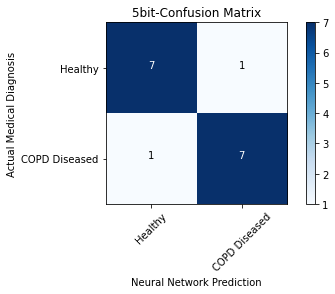

In [47]:
# 10-bit confusion matrix with the updated weight and bias values 

model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Five_bit_predictions = model.predict_classes(X_test, batch_size=10, verbose=0)

cm_FiveBit = confusion_matrix(y_test, Five_bit_predictions)

plot_confusion_matrix(cm_FiveBit, cm_plot_labels, title='5bit-Confusion Matrix')

In [48]:
Performance = np.mean(y_test==Five_bit_predictions)
print ('Five-bit performance:', Performance)

Five-bit performance: 0.875


In [0]:
# Trained network parameters/weights extraction for the hardware deployment

weight = torch.tensor(w1, dtype=torch.float, device='cpu')  
weight=weight.numpy()

np.savetxt('SNN80-SG_W1.csv', weight, delimiter=',',fmt='%1.2f')
files.download('SNN80-SG_W1.csv')

weight2 = torch.tensor(w2, dtype=torch.float, device='cpu')  
weight2=weight2.numpy()

np.savetxt('SNN80-SG_W2.csv', weight2, delimiter=',',fmt='%1.2f')
files.download('SNN80-SG_W2.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
